# **The goal of this exercise** is use dense neural networks to classify whether a person has alzheimer's or not.


This dataset contains 74,283 records from 20 countries, providing insights into Alzheimer's disease risk factors. It includes demographic, lifestyle, medical, and genetic variables, with a biased distribution to reflect real-world disparities across regions.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')



In [3]:
data = pd.read_csv('/alzheimers_prediction_dataset.csv')
data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [6]:
#exploration of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [7]:
#get a statisctical analysis of the numerical columns
data.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [8]:
#is there any missing data in our dataset
data.isnull().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


<Axes: xlabel='Age', ylabel='Count'>

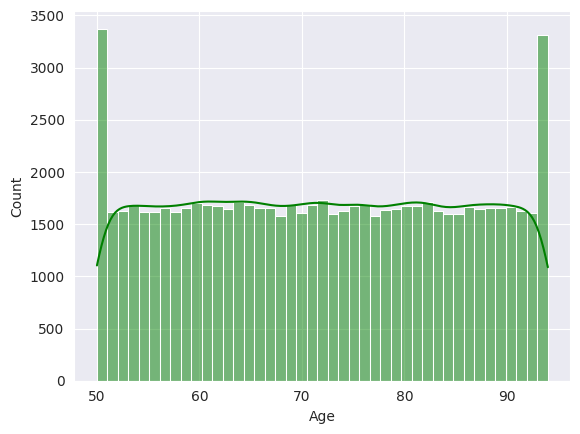

In [9]:
sns.histplot(data=data['Age'],kde=True,color='green')

<Axes: >

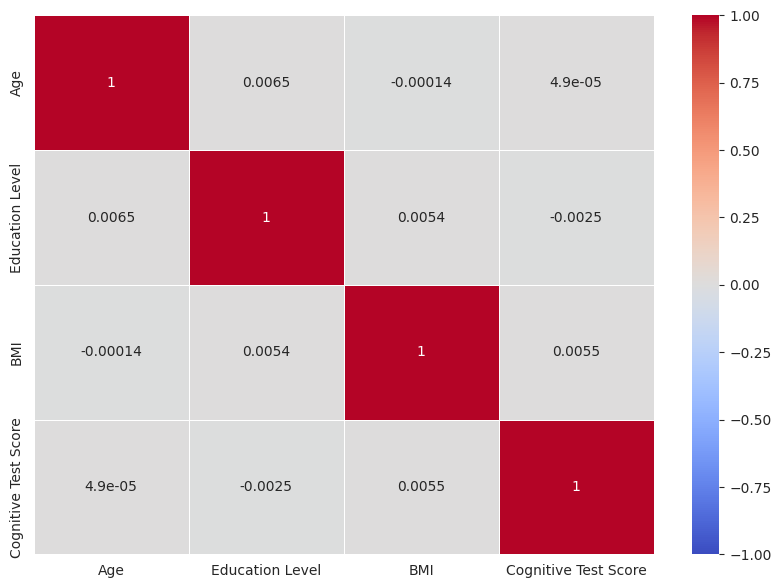

In [18]:
#get the relationship between numerical colums
num_cols = [col for col in data.columns if data[col].dtype != 'object']

plt.figure(figsize=(10,7))
sns.heatmap(data=data[num_cols].corr(),annot=True,cmap='coolwarm',vmin=-1, vmax=1, linewidths=0.5)

#it appears the data is very much uncorelated

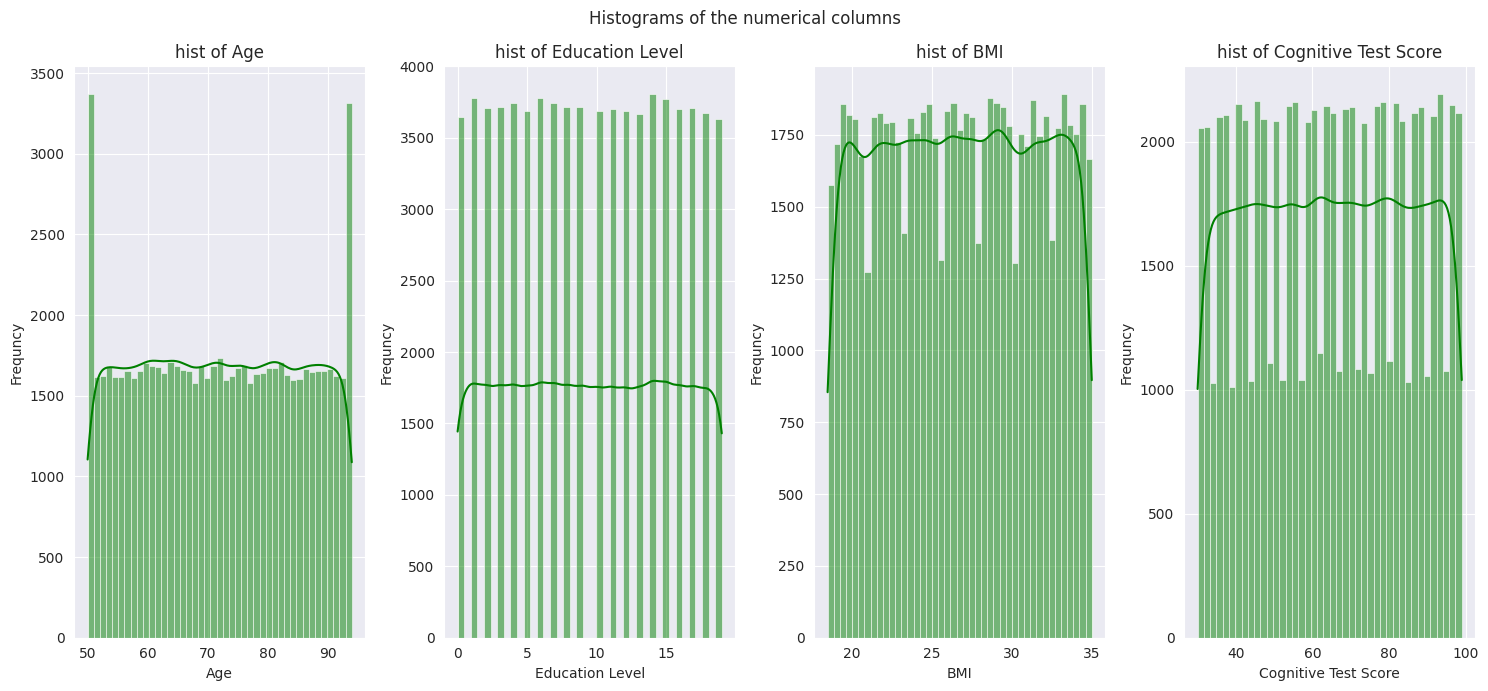

In [23]:
#plot the distribution of the num_cols

fig, ax = plt.subplots(1,len(num_cols),figsize=(15,7))

plt.suptitle('Histograms of the numerical columns')

for i,_ in enumerate(data[num_cols]):
  sns.histplot(data=data[_],ax=ax[i],kde=True,color='green')
  ax[i].set_title(f'hist of {_}')
  ax[i].set_xlabel(_)
  ax[i].set_ylabel('Frequncy')

plt.tight_layout()

In [25]:
#encode the categorical columns
cat_cols = [col for col in data.columns if col not in num_cols]
print(cat_cols,len(cat_cols))

['Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis'] 21


In [27]:
for _ in cat_cols:
  data[_] = LabelEncoder().fit_transform(data[_])

data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,16,90,1,1,33.0,2,2,1,0,0,1,0,90,1,2,1,0,1,1,0,1,2,0,1,0
1,0,72,1,7,29.9,2,1,0,0,0,1,0,65,1,1,1,2,2,2,0,0,1,0,1,0
2,14,86,0,19,22.9,0,0,1,0,1,1,0,43,0,1,0,2,0,1,0,1,2,0,0,0
3,4,53,1,17,31.2,1,2,2,1,0,1,0,81,2,0,1,2,1,1,0,0,2,1,0,0
4,17,58,0,3,30.0,0,1,0,1,0,1,0,49,0,2,2,0,0,0,0,1,2,0,0,0


In [34]:
#separate the data into training and testing
features = data.drop(['Alzheimer’s Diagnosis','Urban vs Rural Living','Income Level','Country'],axis=1)
target = data['Alzheimer’s Diagnosis']

features = StandardScaler().fit_transform(features)

print(features.shape,target.shape)

(74283, 21) (74283,)


In [35]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=20)

for _ in x_train,x_test,y_train,y_test :
  print(_.shape)

(59426, 21)
(14857, 21)
(59426,)
(14857,)


In [40]:
model = Sequential([

    Dense(256,activation='relu',input_shape=(features.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 256)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 68,417 (267.25 KB)

 Trainable params: 67,169 (262.38 KB)

 Non-trainable params: 1,248 (4.88 KB)

In [41]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6091 - loss: 0.7052 - val_accuracy: 0.7150 - val_loss: 0.5540
Epoch 2/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6995 - loss: 0.5751 - val_accuracy: 0.7137 - val_loss: 0.5515
Epoch 3/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7025 - loss: 0.5680 - val_accuracy: 0.7165 - val_loss: 0.5476
Epoch 4/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7024 - loss: 0.5676 - val_accuracy: 0.7142 - val_loss: 0.5465
Epoch 5/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7082 - loss: 0.5596 - val_accuracy: 0.7168 - val_loss: 0.5456
Epoch 6/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7057 - loss: 0.5615 - val_accuracy: 0.7176 - val_loss: 0.5429
Epoch 7/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7083 - loss: 0.5590 - val_accuracy: 0.7168 - val_loss: 0.5444
Epoch 8/100
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7142 - l

In [39]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")





465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6987 - loss: 0.5686
Test Accuracy: 0.6962
